# **Classificador de Cogumelos**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
df = sklearn.datasets.fetch_openml(name='mushroom', version=1, as_frame=True).frame

## Parte 1 - Entendimento do Problema

In [3]:
df.head()

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,x,s,n,t,p,f,c,n,k,e,...,w,w,p,w,o,p,k,s,u,p
1,x,s,y,t,a,f,c,b,k,e,...,w,w,p,w,o,p,n,n,g,e
2,b,s,w,t,l,f,c,b,n,e,...,w,w,p,w,o,p,n,n,m,e
3,x,y,w,t,p,f,c,n,n,e,...,w,w,p,w,o,p,k,s,u,p
4,x,s,g,f,n,f,w,b,k,t,...,w,w,p,w,o,e,n,a,g,e


In [4]:
df.tail()

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
8119,k,s,n,f,n,a,c,b,y,e,...,o,o,p,o,o,p,b,c,l,e
8120,x,s,n,f,n,a,c,b,y,e,...,o,o,p,n,o,p,b,v,l,e
8121,f,s,n,f,n,a,c,b,n,e,...,o,o,p,o,o,p,b,c,l,e
8122,k,y,n,f,y,f,c,n,b,t,...,w,w,p,w,o,e,w,v,l,p
8123,x,s,n,f,n,a,c,b,y,e,...,o,o,p,o,o,p,o,c,l,e


O dataset utilizado contém diversas amostras de cogumelos com suas características morfológicas:

1. cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s 
2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s 
3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y 
4. bruises?: bruises=t,no=f 
5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s 
6. gill-attachment: attached=a,descending=d,free=f,notched=n 
7. gill-spacing: close=c,crowded=w,distant=d 
8. gill-size: broad=b,narrow=n 
9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y 
10. stalk-shape: enlarging=e,tapering=t 
11. stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=? 
12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s 
13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s 
14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y 
15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y 
16. veil-type: partial=p,universal=u 
17. veil-color: brown=n,orange=o,white=w,yellow=y 
18. ring-number: none=n,one=o,two=t 
19. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z 
20. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y 
21. population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y 
22. habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d

A variável alvo é a `class` que indica se o cogumelo é **comestível** (`e`) ou **venenoso** (`p`). Como existem apenas duas categorias, estamos lidando com um problema clássico de classificação binária.

Neste contexto, um **falso positivo** ocorre quando o modelo classifica um cogumelo venenoso como comestível. Já um **falso negativo** acontece quando um cogumelo seguro é classificado como venenoso. Entre os dois, o falso positivo é o erro mais grave: se uma pessoa confiar na predição e ingerir um cogumelo erroneamente classificado, as consequências para a saúde podem ser fatais.

Os usuários finais deste modelo podem variar desde entusiastas sem conhecimento técnico, que desejam saber se podem consumir um cogumelo, até pesquisadores interessados em catalogar espécies. Em ambos os casos, o impacto do erro é crítico, resultando em riscos à vida ou no comprometimento da integridade de uma pesquisa científica.

Caso o dataset fosse atualizado periodicamente, seria necessário reavaliar constantemente as métricas de desempenho do modelo, garantindo que novos padrões de toxicidade sejam aprendidos. Além disso, é fundamental ter cuidado ético com a responsabilidade da informação fornecida, deixando claro que o modelo é uma ferramenta de auxílio e nunca deve substituir a análise de um especialista, dado que nenhum classificador é 100% livre de erros em situações de risco real.

In [5]:
for column in df.columns:
    print(f"Values in column '{column}':")
    print(df[column].value_counts())

Values in column 'cap-shape':
cap-shape
x    3656
f    3152
k     828
b     452
s      32
c       4
Name: count, dtype: int64
Values in column 'cap-surface':
cap-surface
y    3244
s    2556
f    2320
g       4
Name: count, dtype: int64
Values in column 'cap-color':
cap-color
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: count, dtype: int64
Values in column 'bruises%3F':
bruises%3F
f    4748
t    3376
Name: count, dtype: int64
Values in column 'odor':
odor
n    3528
f    2160
s     576
y     576
a     400
l     400
p     256
c     192
m      36
Name: count, dtype: int64
Values in column 'gill-attachment':
gill-attachment
f    7914
a     210
Name: count, dtype: int64
Values in column 'gill-spacing':
gill-spacing
c    6812
w    1312
Name: count, dtype: int64
Values in column 'gill-size':
gill-size
b    5612
n    2512
Name: count, dtype: int64
Values in column 'gill-color':
gill-color
b    1728
p    1492
w    1202
n    1048
g     

Ao observar a saída, fica evidente que o dataset é composto exclusivamente por **dados categóricos**.

In [6]:
df['class'].value_counts() / len(df)

class
e    0.517971
p    0.482029
Name: count, dtype: float64

Ao calcular a frequência relativa da variável alvo, observamos que aproximadamente **51,80%** dos cogumelos são **comestíveis** (`e`) e **48,20%** são **venenosos** (`p`). Essa distribuição demonstra que o dataset está balanceado.

## Parte 2 - Preparação dos Dados

### Tratamento de Valores Ausentes

In [7]:
df.isna().sum()

cap-shape                      0
cap-surface                    0
cap-color                      0
bruises%3F                     0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
class                          0
dtype: int64

In [8]:
df.isna().sum() / len(df) * 100

cap-shape                    0.000000
cap-surface                  0.000000
cap-color                    0.000000
bruises%3F                   0.000000
odor                         0.000000
gill-attachment              0.000000
gill-spacing                 0.000000
gill-size                    0.000000
gill-color                   0.000000
stalk-shape                  0.000000
stalk-root                  30.526834
stalk-surface-above-ring     0.000000
stalk-surface-below-ring     0.000000
stalk-color-above-ring       0.000000
stalk-color-below-ring       0.000000
veil-type                    0.000000
veil-color                   0.000000
ring-number                  0.000000
ring-type                    0.000000
spore-print-color            0.000000
population                   0.000000
habitat                      0.000000
class                        0.000000
dtype: float64

Observe que apenas na coluna `stalk_root` existem valores ausentens. Temos aqui um caso de MNAR, isso se deve ao fato de que quando `stalk_root` é `?` (missing), o pandas entende que o valor é ausente. Para resolver isso, iremos inserir o valor `m` no lugar dos valores ausentes.

In [9]:
df['stalk-root'] = df['stalk-root'].cat.add_categories('m')
df['stalk-root'] = df['stalk-root'].fillna('m')

In [10]:
df['stalk-root'].value_counts()

stalk-root
b    3776
m    2480
e    1120
c     556
r     192
Name: count, dtype: int64

In [11]:
df.isna().sum()

cap-shape                   0
cap-surface                 0
cap-color                   0
bruises%3F                  0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
class                       0
dtype: int64

### Codificação de Variáveis Categóricas

Como não existe uma ordem nas variáveis categóricas, iremos usar o One Hot Encoding para variáveis de entrada e o Label Encoder para variáveis de saída.

In [12]:
X = df.drop('class', axis=1)
y = df['class']

X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42,
)

le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

preprocessor = ColumnTransformer(
    transformers=[
        ('nominal', OneHotEncoder(drop='if_binary', sparse_output=False), X_train_raw.columns),
    ],
)

X_train_processed = preprocessor.fit_transform(X_train_raw)
X_test_processed = preprocessor.transform(X_test_raw)

### Remoção de Colunas

Filtramos variáveis independentes que são redundantes entre si. Faremos isso através da identificação de pares de variáveis com correlação superior a **95%**, comparação de qual das duas possui maior correlação com a variável **`target`** e em seguida removeres a variável que for menos relevante para a predição.

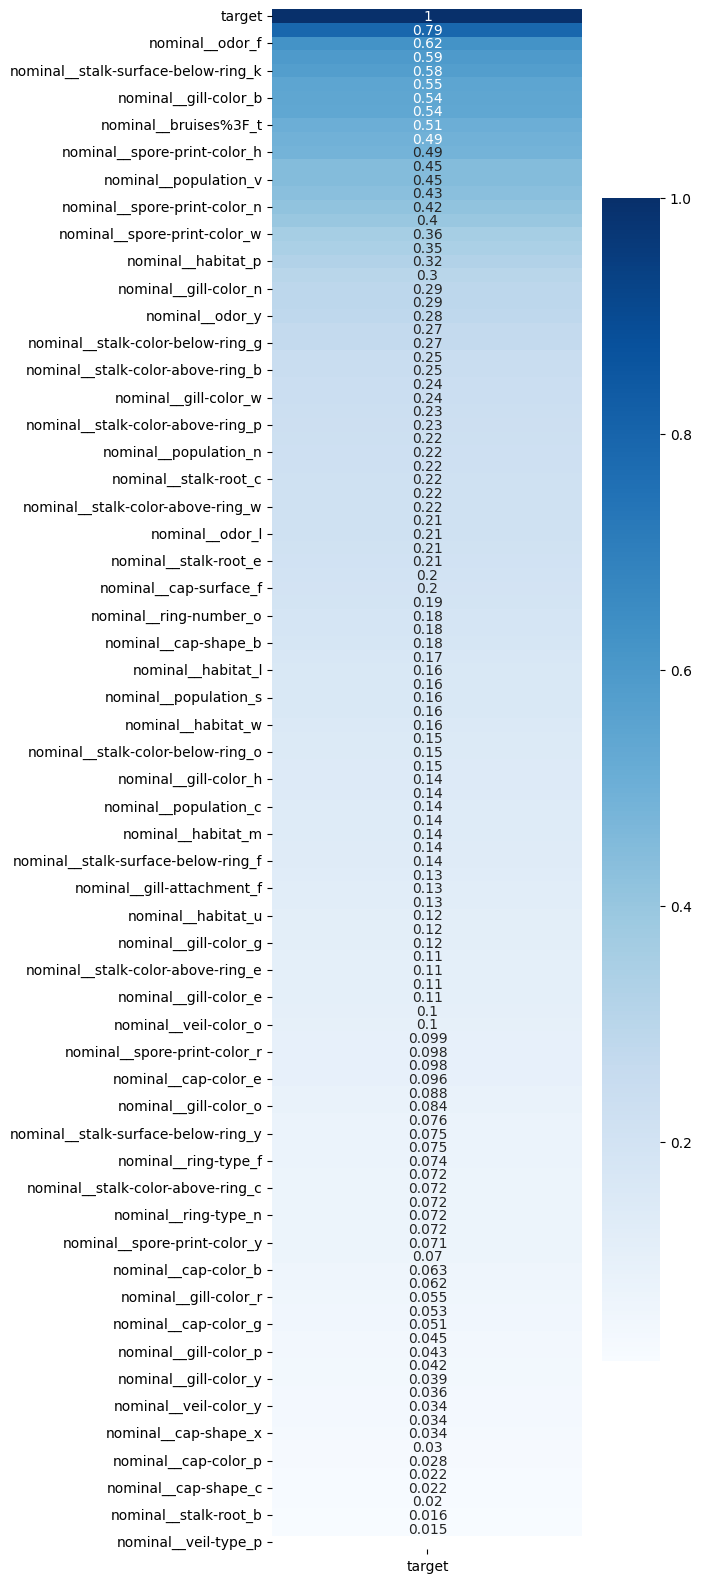

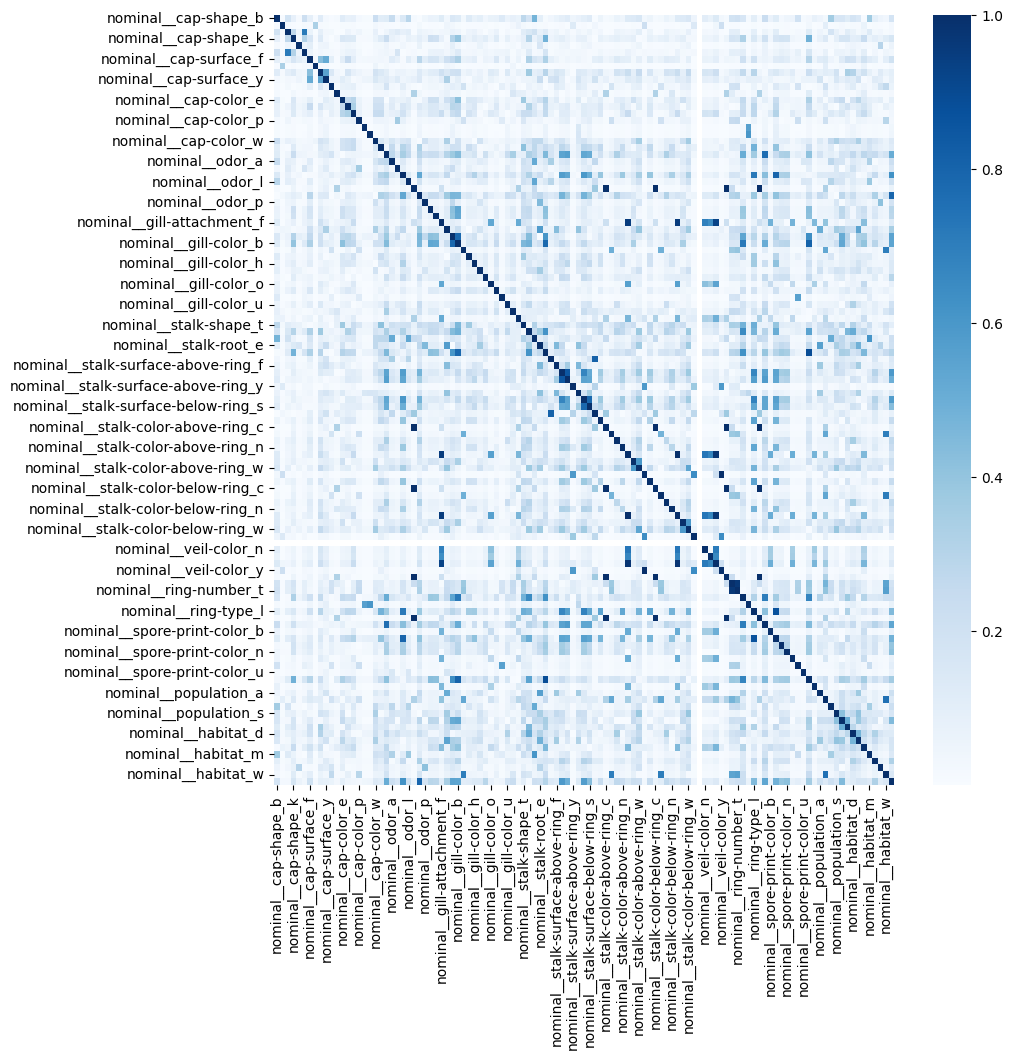

In [13]:
column_names = preprocessor.get_feature_names_out()
df_train_processed = pd.DataFrame(X_train_processed, columns=column_names)
df_train_processed['target'] = y_train_encoded
corr_matrix = df_train_processed.corr().abs()

plt.figure(figsize=(5, 20))
sns.heatmap(
    corr_matrix[['target']].sort_values(by='target', ascending=False),
    annot=True,
    cmap='Blues',
)
plt.show()

plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, cmap='Blues')
plt.show()

In [14]:
target_corr = corr_matrix['target']
target_corr = pd.Series(target_corr).abs()

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

to_drop = set()
threshold = 0.95

for col in upper.columns:
    if col == 'target':
        continue
    high_corr_features = upper.index[upper[col] > threshold].tolist()
    for feature in high_corr_features:
        if feature == 'target':
            continue
        if target_corr[col] < target_corr[feature]:
            to_drop.add(col)
        else:
            to_drop.add(feature)

X_train_reduced = df_train_processed.drop(columns=[*to_drop, 'target'])
df_test_processed = pd.DataFrame(X_test_processed, columns=column_names)
X_test_reduced = df_test_processed.drop(columns=[*to_drop])

## Parte 3

Modelos usados serão: **Regressão Logística** e **Random Forest**. O primeiro servirá como baseline, enquanto o objetivo do segundo é maximizar a precisão, dado que sua estrutura captura regras hierárquicas e interações não lineares entre os atributos.

In [15]:
log_1 = LogisticRegression(penalty='l2', C=0.1, solver='lbfgs', max_iter=1000)
log_1.fit(X_train_reduced, y_train_encoded)

log_2 = LogisticRegression(penalty='elasticnet', l1_ratio=0.5, C=1.0, solver='saga', max_iter=2000)
log_2.fit(X_train_reduced, y_train_encoded)

/home/marcos/Desktop/repositories/mushroom-classifier/.venv/lib/python3.14/site-packages/sklearn/linear_model/_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
/home/marcos/Desktop/repositories/mushroom-classifier/.venv/lib/python3.14/site-packages/sklearn/linear_model/_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'elasticnet'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.5
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [16]:
rf_1 = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_leaf=5, random_state=42)
rf_1.fit(X_train_reduced, y_train_encoded)

rf_2 = RandomForestClassifier(
    n_estimators=500, max_features='sqrt', bootstrap=True, random_state=42,
)
rf_2.fit(X_train_reduced, y_train_encoded)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",500
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [17]:
y_pred_log_1 = log_1.predict(X_test_reduced)
y_pred_rf_1 = rf_1.predict(X_test_reduced)
y_pred_log_2 = log_2.predict(X_test_reduced)
y_pred_rf_2 = rf_2.predict(X_test_reduced)

## Parte 4

In [18]:
print(classification_report(y_test_encoded, y_pred_log_1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [19]:
print(classification_report(y_test_encoded, y_pred_log_2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [20]:
print(classification_report(y_test_encoded, y_pred_rf_1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [21]:
print(classification_report(y_test_encoded, y_pred_rf_2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



<Axes: >

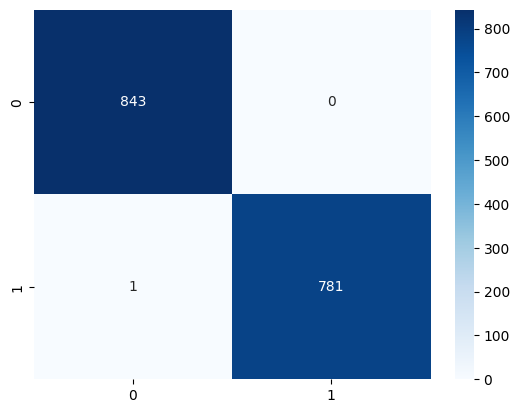

In [22]:
cm = confusion_matrix(y_test_encoded, y_pred_log_1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

<Axes: >

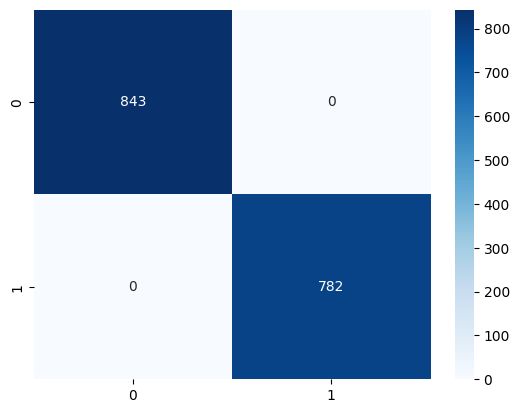

In [23]:
cm = confusion_matrix(y_test_encoded, y_pred_log_2)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

<Axes: >

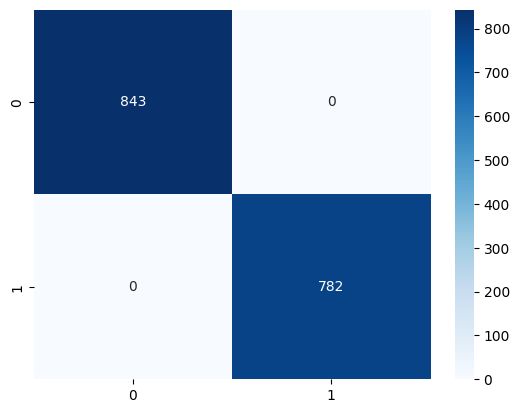

In [24]:
cm = confusion_matrix(y_test_encoded, y_pred_rf_1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

<Axes: >

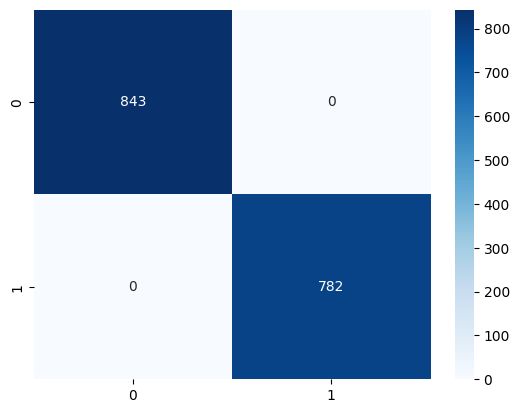

In [25]:
cm = confusion_matrix(y_test_encoded, y_pred_rf_2)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

A avaliação dos modelos mostrou um excelente desempenho, com todos os algoritmos atingindo 100% de precisão em todas as métricas (acurácia, precisão, recall e F1-Score). Através da análise do `classification_report` e das matrizes de confusão, observa-se que tanto os modelos lineares, como a Regressão Logística, quanto os modelos baseados em árvores, como o Random Forest, foram capazes de distinguir entre cogumelos comestíveis e venenosos.

Este resultado indica que o conjunto de dados possui características altamente discriminatórias e que as classes são linearmente separáveis no espaço de atributos utilizado. Portanto, os modelos demonstram total confiabilidade dentro das condições deste dataset.